<a href="https://colab.research.google.com/github/29Abhishek02/Student-Mental-Health/blob/main/Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# @title
from google.colab import files
uploaded = files.upload()

Saving StressLevelDataset.csv to StressLevelDataset.csv


In [ ]:
# @title
import io
df = pd.read_csv(io.BytesIO(uploaded['StressLevelDataset.csv']))

In [ ]:
# @title
data = pd.read_csv('StressLevelDataset.csv')

In [ ]:
# @title
df.head(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
# @title
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [ ]:
# @title
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

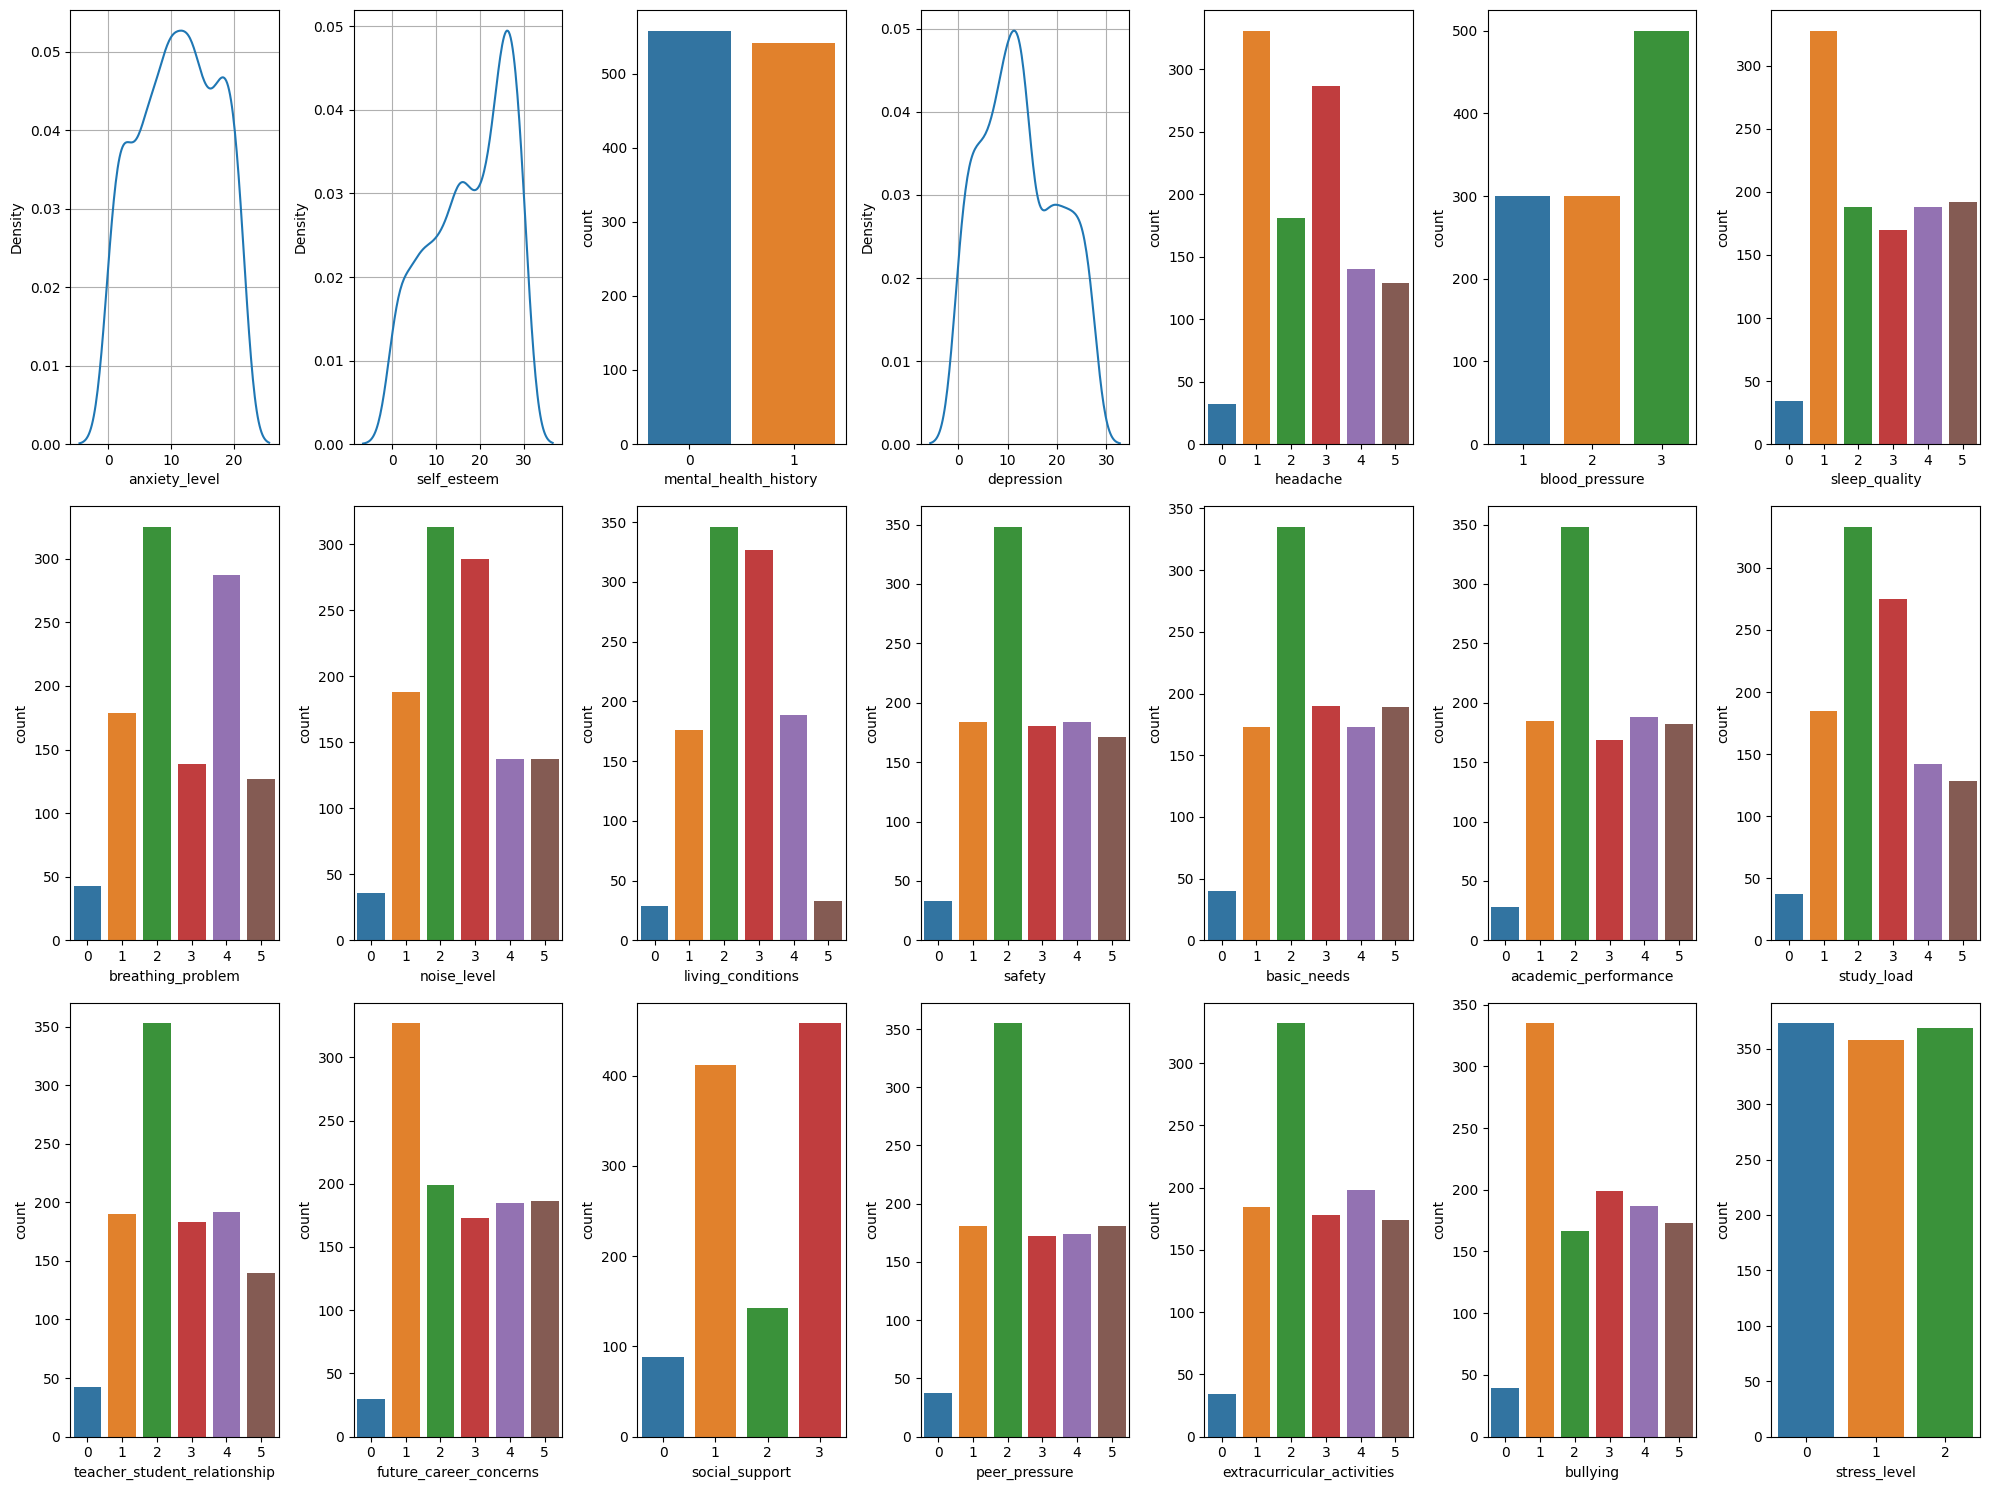

In [ ]:
# @title
r = 3
c = 7
it = 1
fig, axs = plt.subplots(r, c, figsize=(20, 15))
for i in df.columns:
    if it > r * c:
        break
    plt.subplot(r, c, it)
    if df[i].nunique() > 6:
        sns.kdeplot(df[i])
        plt.grid()
    else:
        sns.countplot(x=df[i])
    it += 1
plt.tight_layout()
plt.show()

In [ ]:
# @title
fig_histograms = px.histogram(data, x=data.columns, marginal="rug")
fig_histograms.show()

In [ ]:
# @title
corr_matrix = data.corr()

fig_heatmap = px.imshow(corr_matrix.values,
                        x=corr_matrix.index,
                        y=corr_matrix.columns,
                        labels=dict(color="Correlation"),
                        color_continuous_scale="icefire")
fig_heatmap.show()

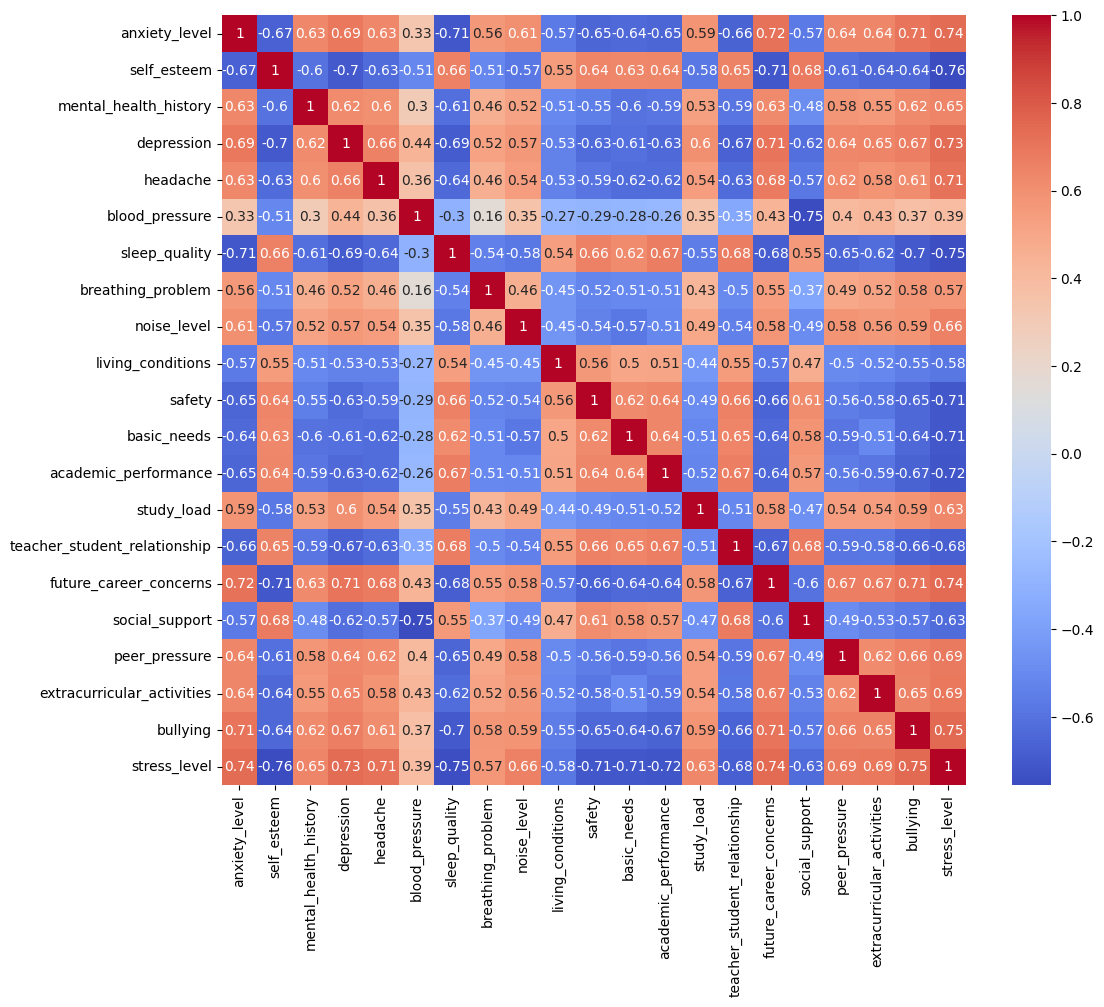

In [ ]:
# @title
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

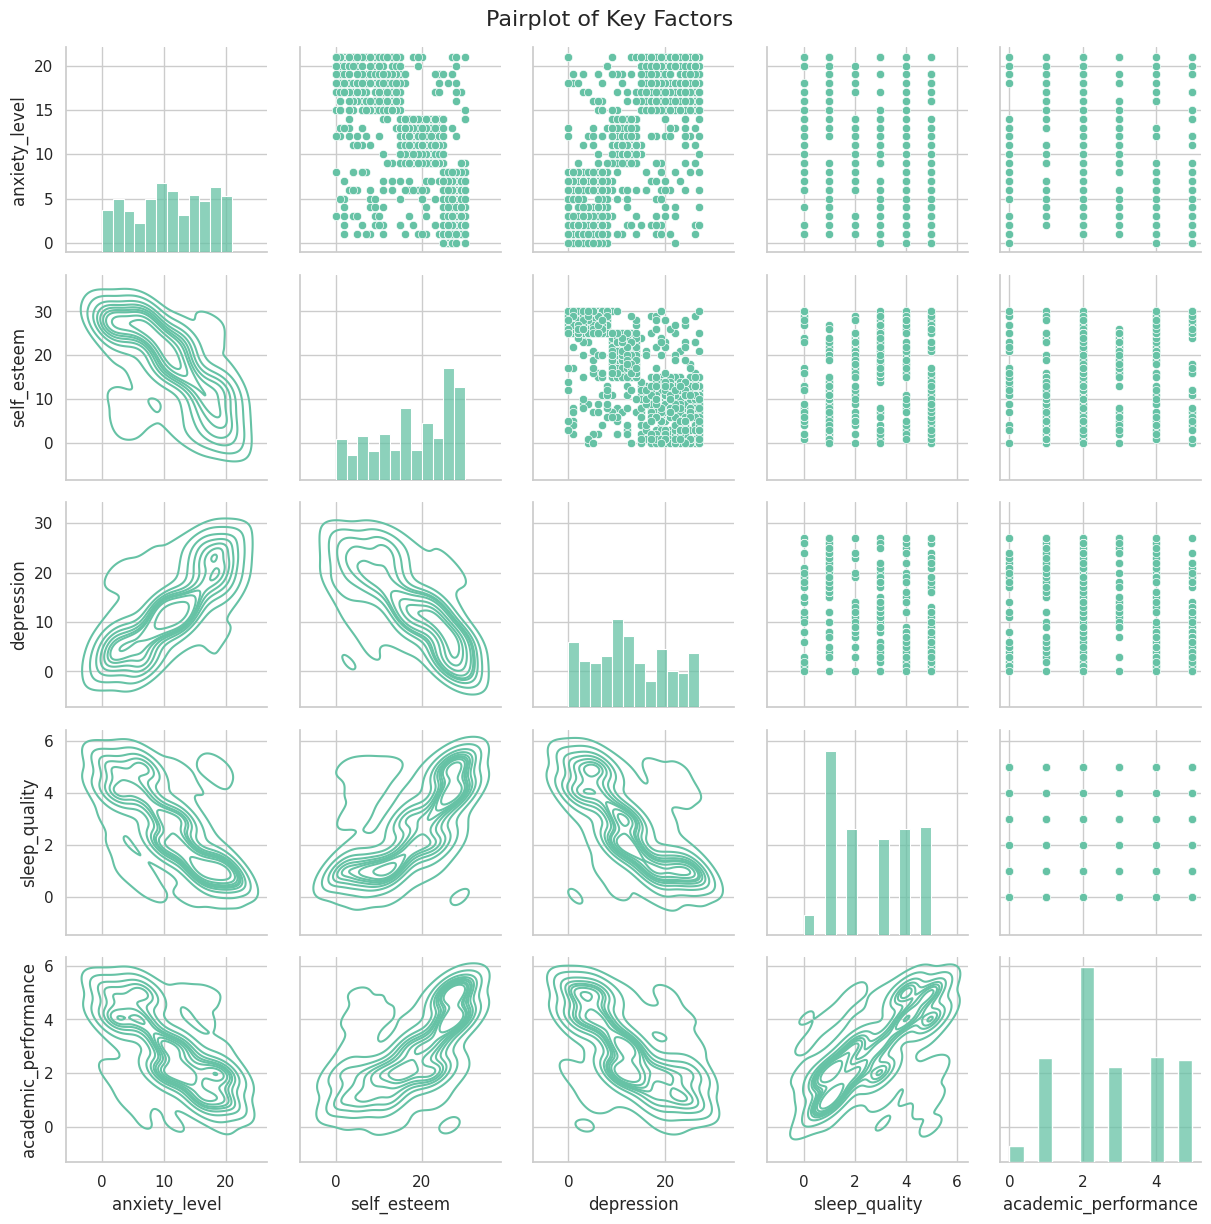

Factor: Psychological
- Feature: anxiety_level, Importance: 0.24495697215160087
- Feature: self_esteem, Importance: 0.5484431273484738
- Feature: mental_health_history, Importance: 0.02017984684464793
- Feature: depression, Importance: 0.18642005365527753

Factor: Physiological
- Feature: headache, Importance: 0.3908005964660774
- Feature: blood_pressure, Importance: 0.05069012323447486
- Feature: sleep_quality, Importance: 0.48937612592704
- Feature: breathing_problem, Importance: 0.06913315437240779

Factor: Environmental
- Feature: noise_level, Importance: 0.15811242811220327
- Feature: living_conditions, Importance: 0.12780827336276368
- Feature: safety, Importance: 0.30836690497995733
- Feature: basic_needs, Importance: 0.4057123935450758

Factor: Academic
- Feature: academic_performance, Importance: 0.4231390721940413
- Feature: study_load, Importance: 0.10325847882142432
- Feature: teacher_student_relationship, Importance: 0.24617362419649524
- Feature: future_career_concerns, I

In [ ]:
# @title
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)

# Show the plot
plt.show()



# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_


    # Store feature importances in the dictionary

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

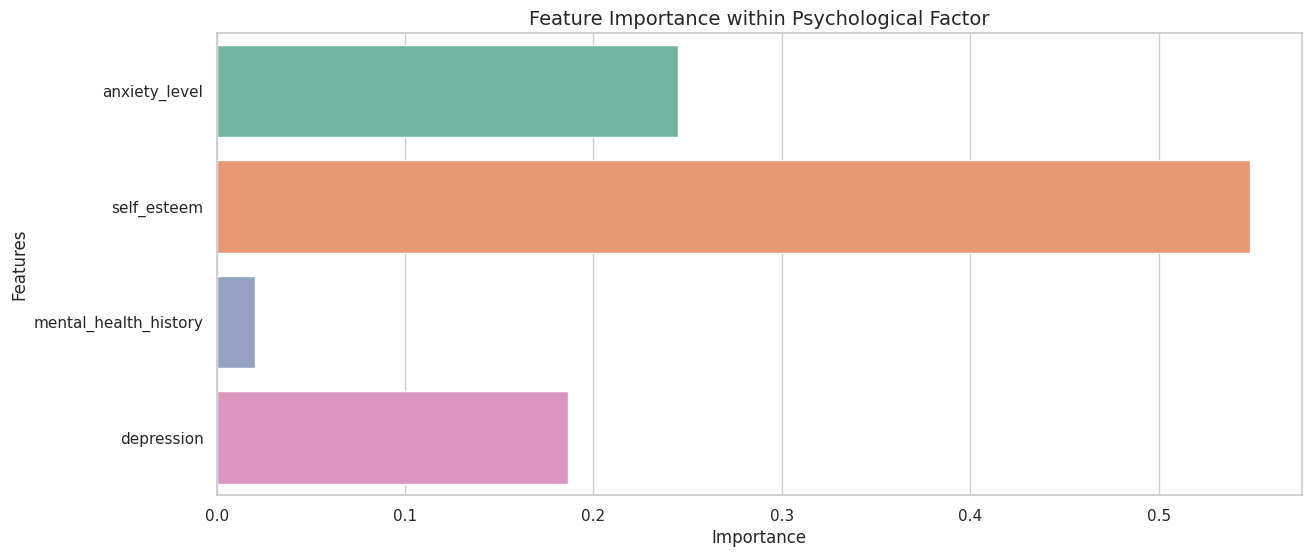

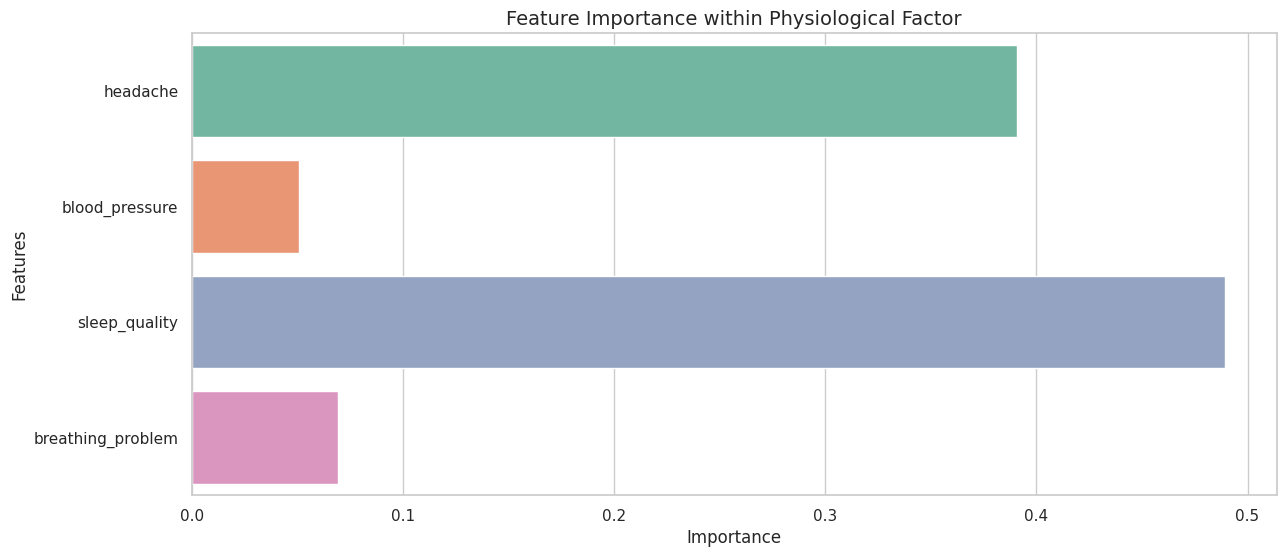

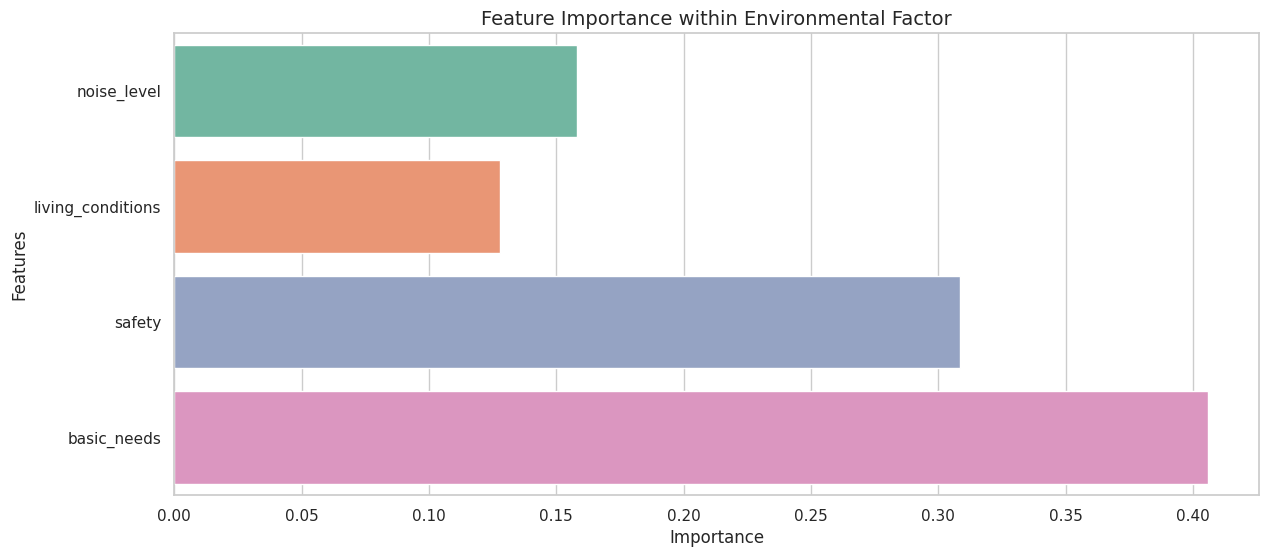

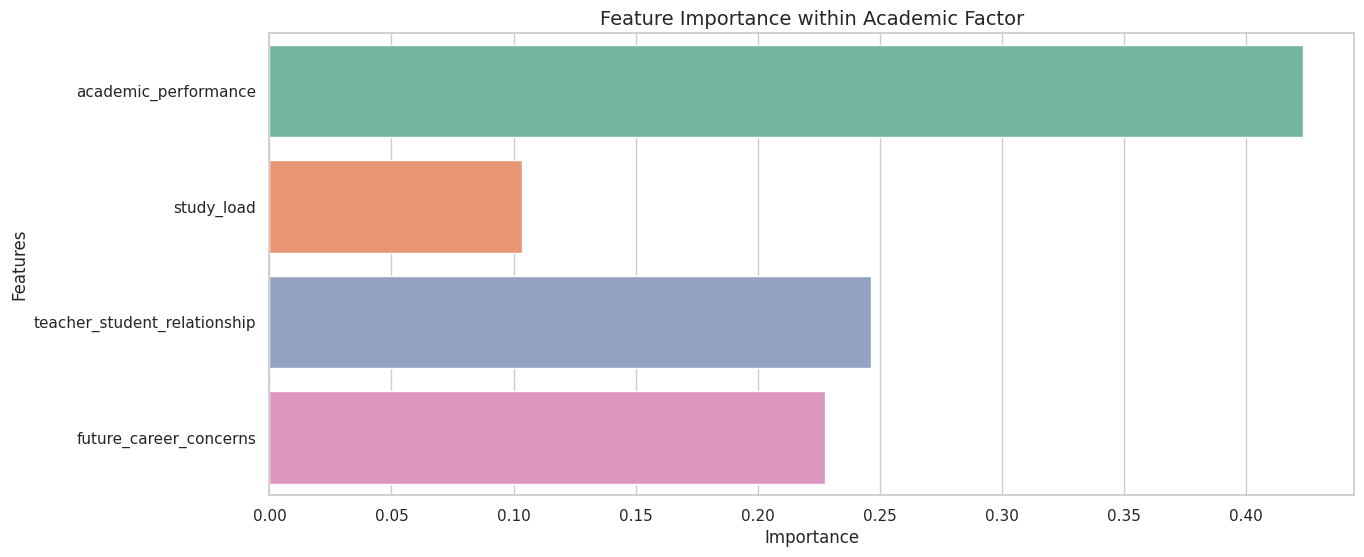

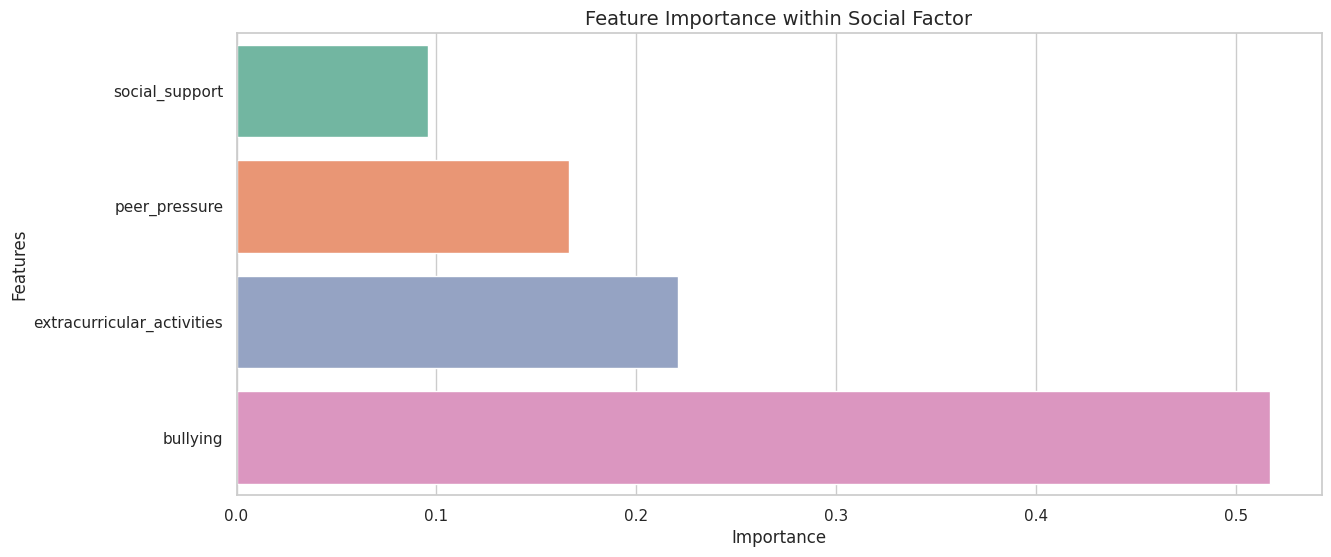

In [ ]:
# @title
psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']
# Create bar charts for feature importance within each factor
def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(14, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor", fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.show()
plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

The averrage of self-steem in the dataset is:  17.78
Number of students that have less than the average level of self-steem is:  507


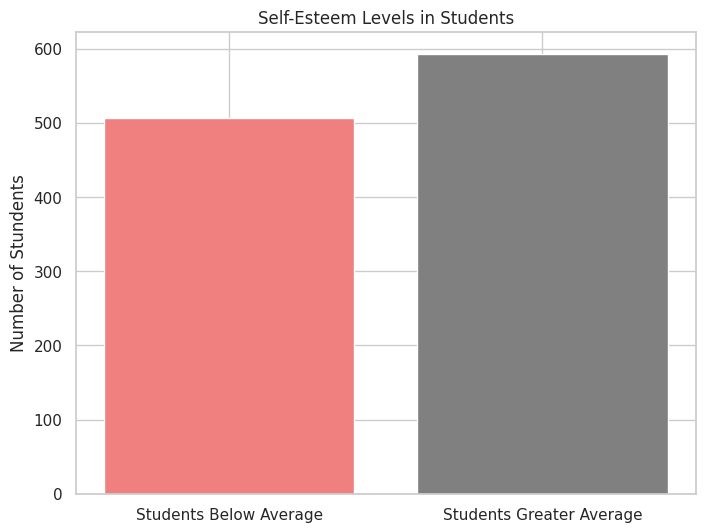

In [ ]:
# @title
# Calculating average self-steem level of the dataset
average_selfsteem = df['self_esteem'].mean().round(2)
print('The averrage of self-steem in the dataset is: ', average_selfsteem)

# Counting number of students that have less than the average of self-steem
students_below_average = df[df['self_esteem'] < average_selfsteem]['self_esteem'].count()
print('Number of students that have less than the average level of self-steem is: ', students_below_average)

# Visualizing
plt.figure(figsize=(8, 6))
plt.bar(['Students Below Average', 'Students Greater Average'], [students_below_average, len(df)-students_below_average], color=['lightcoral', 'gray'])
plt.title('Self-Esteem Levels in Students')
plt.ylabel('Number of Stundents')
plt.show()

Number of Students with depression is:  1061
Percentage of students that have experience bullying is:  96.45


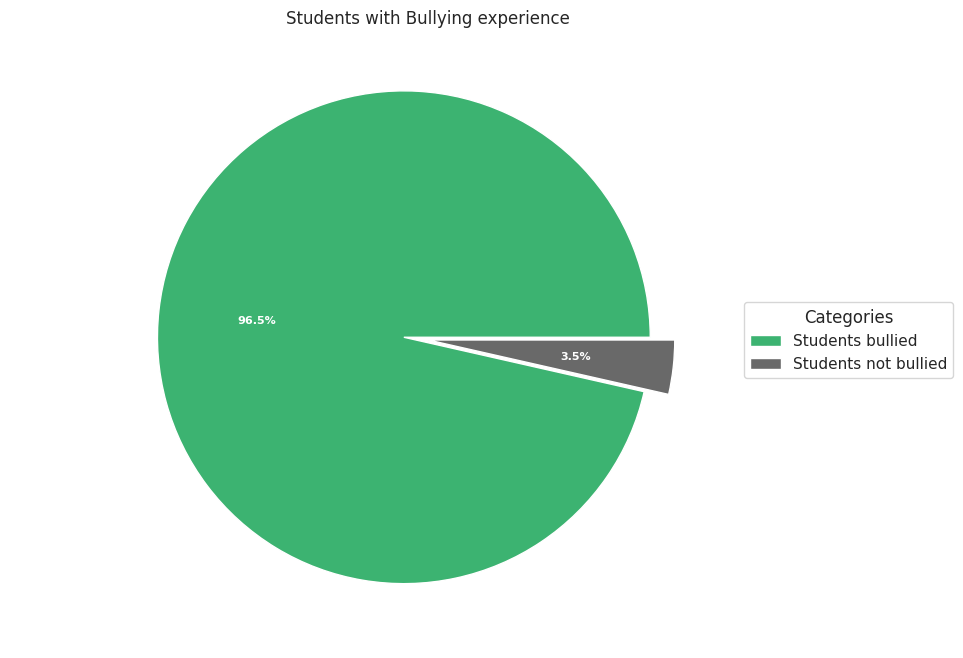

In [ ]:
# @title
# Calculating number of students have experienced bullying
students_bullying = df[df['bullying'] > 0].shape[0]
print('Number of Students with depression is: ', students_bullying)

# Calculating the percentage of students that have experience bullying
percentage_bullying = round(students_bullying / len(df) * 100, 2)
print('Percentage of students that have experience bullying is: ', percentage_bullying)

# Visualizing bullying percentage with a pie chart
labels = ['Students bullied', 'Students not bullied']
sizes = [students_bullying, 1100 - students_bullying]
colors = ['mediumseagreen', 'dimgray']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, explode=explode,
                                  autopct='%1.1f%%', textprops=dict(color="w"))

ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")

ax.set_title('Students with Bullying experience')
plt.show()

Number of students of the dataset with depression is:  1056
Percentage of students with depression is:  96.0


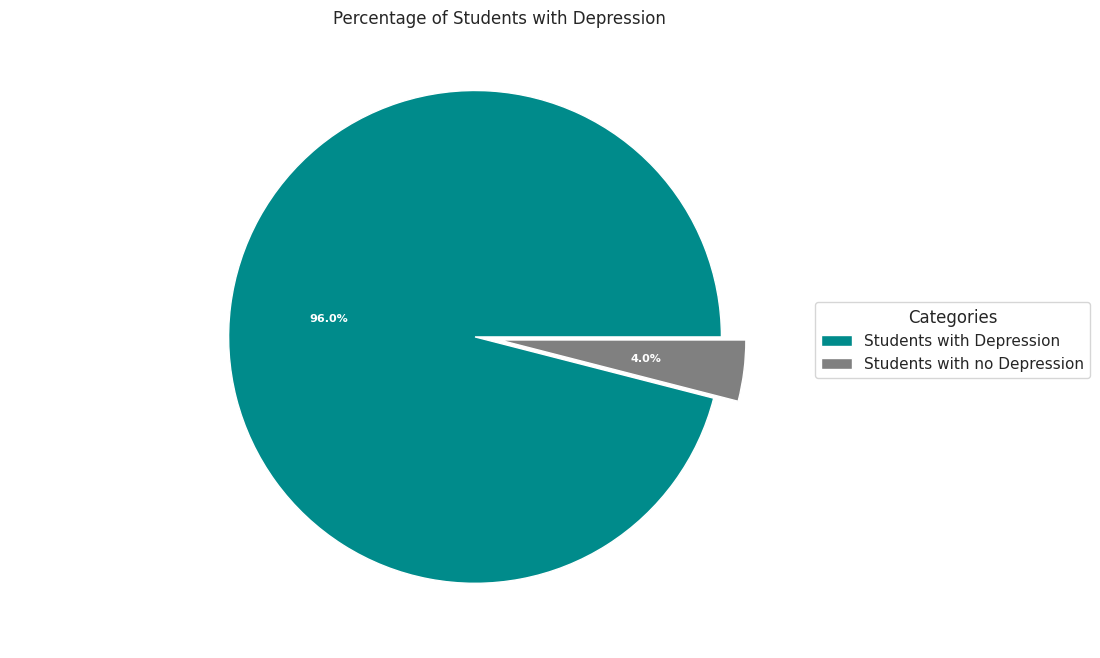

In [ ]:
# @title
students_with_depression = df[df['depression'] > 0].shape[0]
print('Number of students of the dataset with depression is: ', students_with_depression)

# Calculating the percentage
percentage_depression = round(students_with_depression / len(df) * 100, 2)
print('Percentage of students with depression is: ', percentage_depression)

# Visualizing with a pie chart
labels = ['Students with Depression', 'Students with no Depression']
sizes = [students_with_depression, 1100 - students_with_depression]
colors = ['darkcyan', 'gray']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct='%1.1f%%', textprops=dict(color="w"))

ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")

ax.set_title('Percentage of Students with Depression')
plt.show()

In [ ]:
# @title
X = data.drop('stress_level', axis=1)
y = data['stress_level']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(train_x, train_y)
RF_test_predictions = rf_model.predict(test_x)
RF_test_error = mean_squared_error(test_y, RF_test_predictions)
print("Test Set Mean Squared Error (Random Forest):", RF_test_error)

Test Set Mean Squared Error (Random Forest): 0.1303709090909091


In [ ]:
# @title
# Neural Network Regression
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train(model, train_data, train_labels, test_data, test_labels, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        train_outputs = model(train_data)
        train_loss = criterion(train_outputs, train_labels)
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())
        model.eval()
        with torch.no_grad():
            test_outputs = model(test_data)
            test_loss = criterion(test_outputs, test_labels)
            test_losses.append(test_loss.item())
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}: Train Loss = {train_loss.item()}, Test Loss = {test_loss.item()}")
    return train_losses, test_losses

In [ ]:
# @title
# Hyperparameters
input_size = train_x.shape[1]
hidden_size = 64
num_epochs = 100
learning_rate = 0.001
# Model instantiation
model = Net(input_size, hidden_size)
# Convert data to NumPy arrays
train_data = train_x.values
train_labels = train_y.values
test_data = test_x.values
test_labels = test_y.values
# Convert data to PyTorch tensors
train_data = torch.from_numpy(train_data).float()
train_labels = torch.from_numpy(train_labels).float().unsqueeze(1)
test_data = torch.from_numpy(test_data).float()
test_labels = torch.from_numpy(test_labels).float().unsqueeze(1)

In [ ]:
# @title
train_losses, test_losses = train(model, train_data, train_labels, test_data, test_labels, num_epochs, learning_rate)

Epoch 10: Train Loss = 0.7962062358856201, Test Loss = 0.8770521879196167
Epoch 20: Train Loss = 0.4256715178489685, Test Loss = 0.4677494168281555
Epoch 30: Train Loss = 0.410550981760025, Test Loss = 0.46746084094047546
Epoch 40: Train Loss = 0.29981034994125366, Test Loss = 0.34465253353118896
Epoch 50: Train Loss = 0.24282145500183105, Test Loss = 0.2661537826061249
Epoch 60: Train Loss = 0.21579280495643616, Test Loss = 0.22119785845279694
Epoch 70: Train Loss = 0.19956132769584656, Test Loss = 0.19978642463684082
Epoch 80: Train Loss = 0.18465600907802582, Test Loss = 0.1831711232662201
Epoch 90: Train Loss = 0.17143037915229797, Test Loss = 0.1714634746313095
Epoch 100: Train Loss = 0.16393199563026428, Test Loss = 0.16790752112865448


In [ ]:
# @title
model.eval()
with torch.no_grad():
    test_outputs = model(test_data)

NN_test_predictions = test_outputs.numpy().flatten()
fig_train_process = go.Figure()
fig_train_process.add_trace(go.Scatter(x=list(range(1, num_epochs + 1)), y=train_losses, mode='lines', name='Train Loss'))
fig_train_process.add_trace(go.Scatter(x=list(range(1, num_epochs + 1)), y=test_losses, mode='lines', name='Test Loss'))

fig_train_process.update_layout(title='Training Process',
                                xaxis_title='Epoch',
                                yaxis_title='Loss',
                                legend=dict(x=0, y=1, traceorder='normal'))

fig_train_process.show()

In [ ]:
# @title
trace_nn_pred = go.Scatter3d(
    x=test_data[:, 0],  # Assuming you have 3 features, adjust indices accordingly
    y=test_data[:, 1],
    z=NN_test_predictions,
    mode='markers',
    name='Predicted Values',
    marker=dict(size=4, color='red')
)

layout = go.Layout(
    title='Neural Network Regression - Predicted Values',
    scene=dict(
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        zaxis=dict(title='Predicted Stress Level')
    )
)

fig_nn = go.Figure(data=[trace_nn_pred], layout=layout)
fig_nn.show()

In [ ]:
# @title
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(train_data, train_labels)
train_predictions = ridge.predict(train_data)
Ridge_test_predictions = ridge.predict(test_data)
test_rmse = np.sqrt(mean_squared_error(test_labels, Ridge_test_predictions))
print("Test RMSE (Ridge Regression):", test_rmse)

Test RMSE (Ridge Regression): 0.37515911682123465


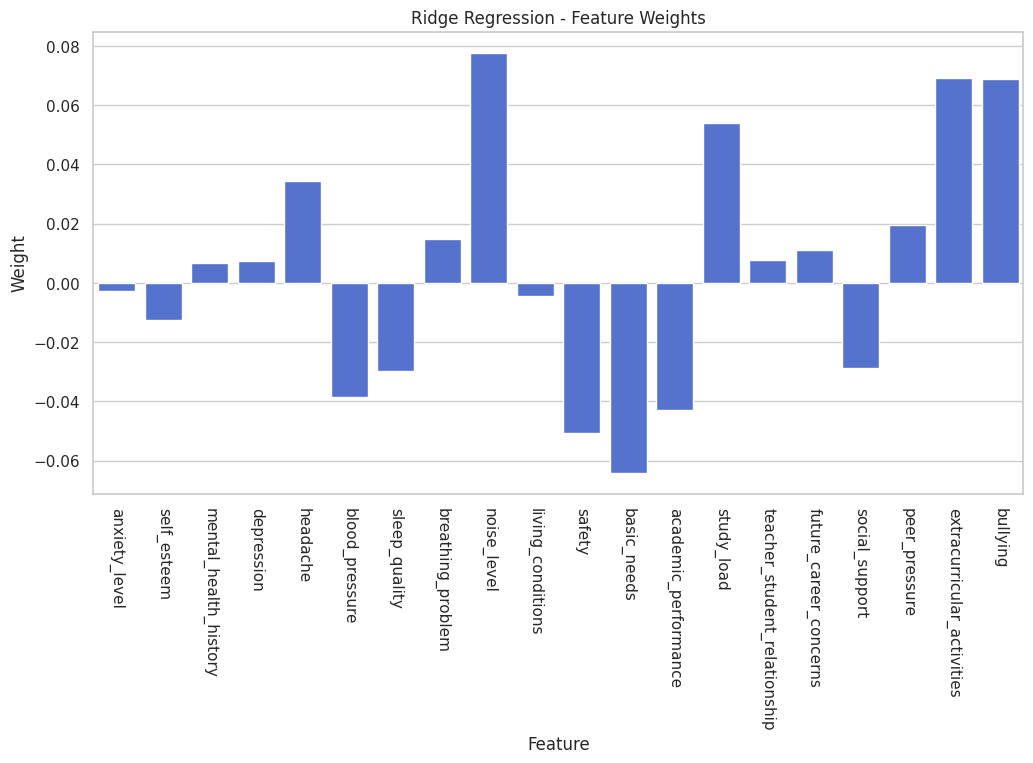

In [ ]:
# @title
# Reshape coefficients
feature_weights = ridge.coef_.flatten()[:len(X.columns)]  # Take only the necessary coefficients
fw = pd.DataFrame({'Feature': X.columns, 'Weight': feature_weights})

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Weight', data=fw, color='royalblue')
plt.title('Ridge Regression - Feature Weights')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.xticks(rotation=270)
plt.show()

In [ ]:
# @title
# Polynomial Regression
degree = 2  # Adjust the degree as needed
poly_reg = make_pipeline(PolynomialFeatures(degree), Ridge())
poly_reg.fit(train_data, train_labels)
Poly_test_predictions = poly_reg.predict(test_data)
poly_test_rmse = np.sqrt(mean_squared_error(test_labels, Poly_test_predictions))
print(f"Test RMSE (Polynomial Regression, Degree {degree}):", poly_test_rmse)

Test RMSE (Polynomial Regression, Degree 2): 0.6645375885422803


In [ ]:
# @title
# Compare Predictions from Different Models
pred = pd.DataFrame({
    'True_y': list(test_y),
    "RF": list(RF_test_predictions),
    "NN": list(NN_test_predictions),
    "Ridge": list(Ridge_test_predictions[:, 0]),
    "Poly": list(Poly_test_predictions.flatten())
})

In [ ]:
# @title
# Scatterplots for Model Comparison using Plotly
fig_model_comparison = go.Figure()

for method in ['RF', "NN", "Ridge", "Poly"]:
    fig_model_comparison.add_trace(
        go.Scatter(x=pred['True_y'], y=pred[method], mode='markers', name=method))

fig_model_comparison.update_layout(title='Model Comparison',
                                   xaxis_title='True Value',
                                   yaxis_title='Predicted Value',
                                   legend=dict(x=0, y=1, traceorder='normal'))

fig_model_comparison.show()